# Cloud Chamber
__Observation of alpha decay

UC Santa Barbara, Physics, Yuning Zhang

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import os

Load data from text files

In [67]:
data1=np.loadtxt("./data/data1.txt")
data2=pd.read_table("./data/data2.txt").values
data3=pd.read_table("./data/data3.txt").values
data_CF4=pd.read_table("./data/data4.txt").values[:,-1]

C:\Users\neuro\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
C:\Users\neuro\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\neuro\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


In [68]:
def get_trajectory_gray_value(n,directory="./data/"):
    gray_value=pd.read_csv(directory+"trj_gv{0}.csv".format(n))
    background=pd.read_csv(directory+"trj_bg{0}.csv".format(n))
    return pd.DataFrame([gray_value.X,gray_value.Y-background.Y]).transpose()

In [69]:
pixel_d=6/354.8#cm
precision=6*pixel_d # 640*480
print("systematic error: "+str(precision)[:7]+"cm") #estimate the error of video measurement

systematic error: 0.10146cm


In [70]:
traj_lens=np.concatenate([data1[:,-1],data2[:,-1],data3[:,-1]])
pd.DataFrame(traj_lens).describe() # description of measurement data

,0
count,1066.000000
mean,3.244537
std,0.504879
min,0.000000
25%,2.933750
50%,3.264500
75%,3.581000
max,4.856000


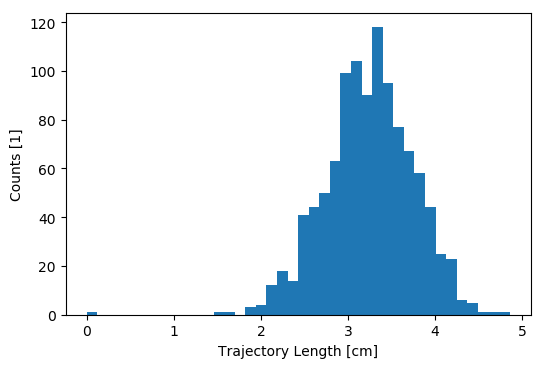

In [71]:
plt.figure().dpi=100
plt.hist(traj_lens,bins=40)
plt.xlabel("Trajectory Length [cm]")
plt.ylabel("Counts [1]")
plt.show() # 

In [72]:
avg_l=np.mean(traj_lens)
std_l=np.std(traj_lens)
sdom_l=std_l/np.sqrt(len(traj_lens))
sigma_l=np.sqrt(sdom_l**2+precision**2)
print("Mean:",avg_l)
print("Uncertainty:",sigma_l)
print("Standard Deviation of Mean:",sdom_l)

Mean: 3.2445365853658537
Uncertainty: 0.1026360904604172
Standard Deviation of Mean: 0.015456265823495005


In [73]:
pd.DataFrame(data_CF4).describe() # basic information of CF4 gas measurement

,0
count,796.000000
mean,2.428146
std,0.331552
min,1.548000
25%,2.195000
50%,2.388500
75%,2.606500
max,4.814000


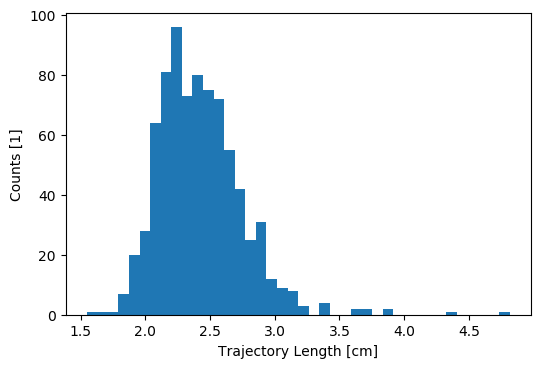

In [74]:
plt.figure().dpi=100
plt.hist(data_CF4,bins=40)
plt.xlabel("Trajectory Length [cm]")
plt.ylabel("Counts [1]")
plt.show()

In [75]:
avg_l_CF4=np.mean(data_CF4)
std_l_CF4=np.std(data_CF4)
sdom_l_CF4=std_l/np.sqrt(len(data_CF4))
sigma_l_CF4=np.sqrt(sdom_l_CF4**2+precision**2)
print("Mean:",avg_l_CF4)
print("Uncertainty:",sigma_l_CF4)
print("Standard Deviation of Mean:",sdom_l_CF4)

Mean: 2.428145728643216
Uncertainty: 0.10303009113739567
Standard Deviation of Mean: 0.01788655271391479


In [76]:
rho_ratio=avg_l_CF4/avg_l
sigma_rho_ratio=rho_ratio*np.sqrt((sigma_l_CF4/avg_l_CF4)**2+(sigma_l/avg_l)**2)
print("Ratio:",rho_ratio)
print("Uncertainty:",sigma_rho_ratio)

Ratio: 0.7483798270591604
Uncertainty: 0.03960845202665759


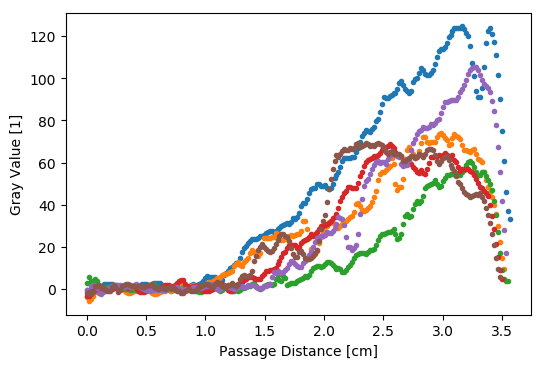

In [77]:
aggregate_Y=pd.DataFrame([])
bound=[210,220]
plt.figure().set_dpi(100)
for n in range(1,20):
    traj_gv=get_trajectory_gray_value(n)
#     print(len(traj_gv.X))
    if bound[0]<len(traj_gv)<bound[1]:
        aggregate_Y=pd.concat([aggregate_Y,traj_gv.Y],axis=1)
        plt.plot(traj_gv.X,traj_gv.Y,".")
plt.xlabel("Passage Distance [cm]")
plt.ylabel("Gray Value [1]")
plt.show()
# we choose some trajectories with similiar length to compare their droplet density with passage distance

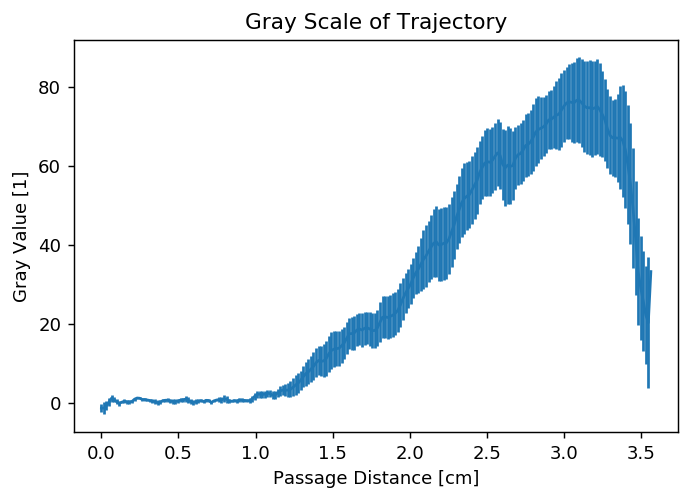

In [78]:
sampling_d=traj_gv.X[2]-traj_gv.X[1]
# aggregate_Y=aggregate_Y.rolling(3).mean()
# aggregate all the trajectories, give the average and SDOM
plt.figure().dpi=130
plt.xlabel("Passage Distance [cm]")
plt.ylabel("Gray Value [1]")
Y_error=aggregate_Y.std(axis=1)/aggregate_Y.count(axis=1).apply(np.sqrt)
X=sampling_d*np.arange(len(aggregate_Y))
Y=aggregate_Y.mean(axis=1)
plt.errorbar(X,Y,yerr=Y_error)
#plt.plot(moving_average(traj_gv.X.values,bit),moving_average(traj_gv.Y.values,bit),".")
plt.title("Gray Scale of Trajectory")
plt.show()

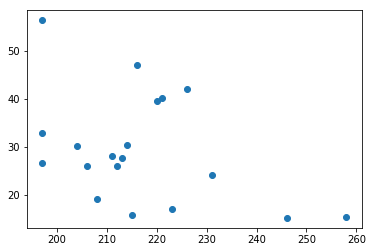

In [79]:
aggregate_gv=[]

for n in range(1,20):
    traj_gv=get_trajectory_gray_value(n)
#     print(len(traj_gv.X))
    aggregate_gv.append([len(traj_gv),traj_gv.Y.mean()])

aggregate_gv=np.array(aggregate_gv)
plt.plot(aggregate_gv[:,0],aggregate_gv[:,1],'o')
plt.show()

Import data from NIST ASTAR particle database *https://physics.nist.gov/PhysRefData/Star/Text/ASTAR.html*

Use data of air as approximation of ethanol

In [80]:
ASTAR_data=pd.read_csv("./data/ASTAR.tsv",sep="\t",index_col=False)
ASTAR_data.head()

,Kinetic_Energy,Electron_Stp_Pow,Nuclear_Stp_Pow,Total_Stp_Pow,CSDA_Range,Projected_Range
0,0.0010,87.5,134.0,221.5,0.000005,0.000002
1,0.0015,108.6,125.6,234.2,0.000008,0.000003
2,0.0020,126.7,117.8,244.4,0.000010,0.000004
3,0.0025,142.7,110.9,253.6,0.000012,0.000005
4,0.0030,157.3,104.9,262.2,0.000014,0.000006


In [81]:
ASTAR_data.describe()

,Kinetic_Energy,Electron_Stp_Pow,Nuclear_Stp_Pow,Total_Stp_Pow,CSDA_Range,Projected_Range
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,102.201025,665.990992,15.418194,681.381653,2.926426,2.925500
std,226.287680,653.933665,29.591813,648.353758,8.347741,8.345373
min,0.001000,13.790000,0.003635,13.790000,0.000005,0.000002
25%,0.085000,107.800000,0.055160,115.100000,0.000151,0.000124
50%,2.250000,463.400000,1.048000,481.500000,0.001474,0.001440
75%,60.000000,1018.000000,15.470000,1031.000000,0.291800,0.291600
max,1000.000000,2019.000000,134.000000,2021.000000,43.100000,43.090000


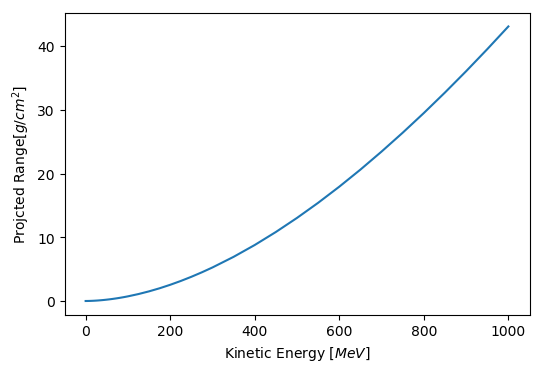

In [82]:
plt.figure().set_dpi(100)
plt.plot(ASTAR_data.Kinetic_Energy,ASTAR_data.Projected_Range)
plt.xlabel(r"Kinetic Energy [$MeV$]")
plt.ylabel(r"Projcted Range[$g/cm^2$]")
plt.show()

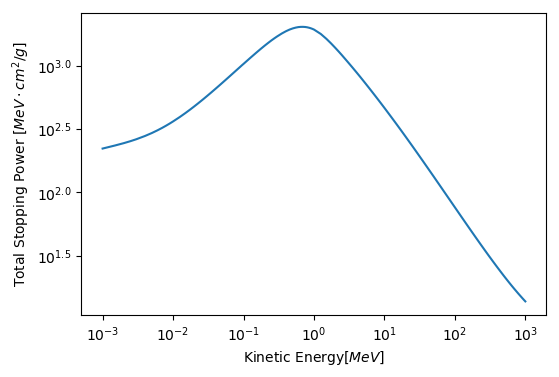

In [83]:
fig,ax=plt.subplots()
fig.set_dpi(100)
plt.plot(np.log10(ASTAR_data.Kinetic_Energy),np.log10(ASTAR_data.Total_Stp_Pow))
plt.ylabel(r"Total Stopping Power [$MeV\cdot cm^2/g$]")
plt.xlabel(r"Kinetic Energy$[MeV]$")
plt.xticks(np.arange(-3,4),np.vectorize(lambda x: r"$10^{"+str(x)+"}$")(np.arange(-3,4)))
plt.yticks(np.arange(1.5,3.3,0.5),np.vectorize(lambda x: r"$10^{"+str(x)+"}$")(np.arange(1.5,3.3,0.5)))
plt.show()

Adpot a CSDA model (with constant energy loss) here:

$E=E_0-kx$

where x is the passage distane in the medium

Thus 

$x=(E_0-E)/k\sim -E$

By a plot with axis of stopping power -E we can have a rough estimation about the realation between the stopping power and x.

Here, the drop density (nucleation) mainly depend on the ionization process which corresponding with the stopping power. We can show the plot and compare it with the curve we get.

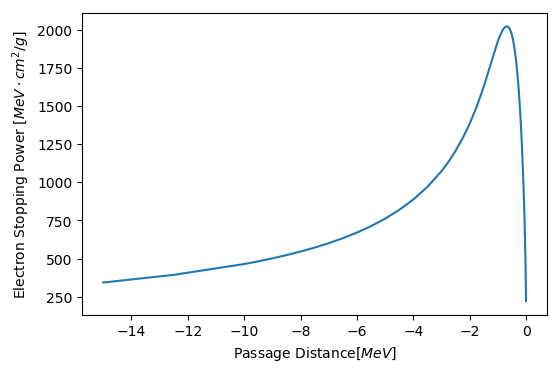

In [84]:
fig,ax=plt.subplots()
fig.set_dpi(100)
bound=80
plt.plot(-ASTAR_data.Kinetic_Energy[:bound],ASTAR_data.Total_Stp_Pow[:bound])
plt.ylabel(r"Electron Stopping Power [$MeV\cdot cm^2/g$]")
plt.xlabel(r"Passage Distance$[MeV]$")
# plt.xticks(np.arange(-3,4),np.vectorize(lambda x: r"$10^{"+str(x)+"}$")(np.arange(-3,4)))
# plt.yticks(np.arange(1.5,3.3,0.5),np.vectorize(lambda x: r"$10^{"+str(x)+"}$")(np.arange(1.5,3.3,0.5)))
plt.show()

This is similiar with the gray value plot above, where the gray value (brightness of the trajectory) is supposed to be a good indicator of droplet density.

Extra comment: here the total stopping power is nearly the same with the electron stopping power

ethanol vapor density from internet source
https://www.ncdoi.com/OSFM/RPD/PT/Documents/Coursework/Ethanol/Module2_InstructorGuide.pdf

In [85]:
ethanol_vapor_density=1.59*10**(-3) #g/cm^3

In [86]:
projected_range=avg_l*ethanol_vapor_density #g/cm^2
print("projected range: ", str(projected_range)[:8],"g/cm^2")

projected range:  0.005158 g/cm^2


In [87]:
ASTAR_data[ASTAR_data.CSDA_Range<projected_range].iloc[-1]

Kinetic_Energy        5.500000
Electron_Stp_Pow    711.700000
Nuclear_Stp_Pow       0.479100
Total_Stp_Pow       712.200000
CSDA_Range            0.005048
Projected_Range       0.005010
Name: 68, dtype: float64

Kinetic Energy is about 5.5 MeV, find more accurate estimation by curve fitting 

In [88]:
upper_bound=80
parameters=np.polyfit(ASTAR_data.CSDA_Range[:upper_bound],ASTAR_data.Kinetic_Energy[:upper_bound],8)
est_KE=np.polyval(parameters,projected_range)
print("estimated kinetic energy:",est_KE)

estimated kinetic energy: 5.534935531898595


In [89]:
sigma_KE=(np.polyval(parameters,projected_range+sigma_l*ethanol_vapor_density)-est_KE,est_KE-np.polyval(parameters,projected_range-sigma_l*ethanol_vapor_density))
print("uncertainty:",sigma_KE)

uncertainty: (0.10624324910943272, 0.10630765955770283)
